In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math
from scipy.sparse.linalg import eigsh
from diffusion_map_algorithm import diffusion_map_algorithm

from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg
from sklearn.decomposition import PCA

# Part one
Demonstrate similarity between diffusion maps and Fourier analysis

## Create and visualize dataset

In [2]:
def tk(k, N):
    return (2*math.pi*k) / (N+1)

N = 1000
X1 = np.zeros((N,2))
tk_arr = np.zeros(N)
for k in range(N):
    tk_arr[k] = tk(k+1,N)
    X1[k] = (math.cos(tk_arr[k]),math.sin(tk_arr[k]))

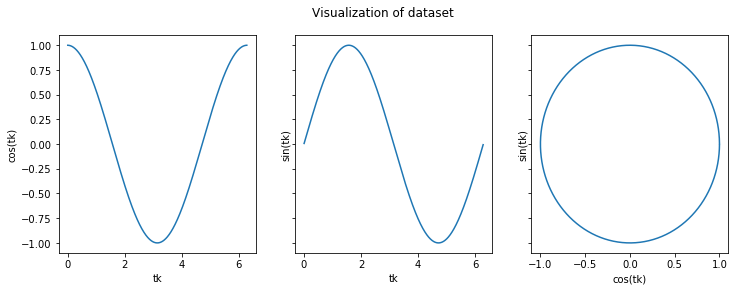

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.suptitle('Visualization of dataset')
fig.subplots_adjust(hspace=3)

ax1.plot(tk_arr, X1[:,0])
ax1.set(xlabel="tk", ylabel="cos(tk)")
ax2.plot(tk_arr, X1[:,1])
ax2.set(xlabel="tk", ylabel="sin(tk)")
ax3.plot(X1[:,0], X1[:,1])
ax3.set(xlabel="cos(tk)", ylabel="sin(tk)")
plt.show()

## Compute diffusion map and plot eigenfunctions

In [4]:
_lambda1, _phi1 = diffusion_map_algorithm(X1, 4)

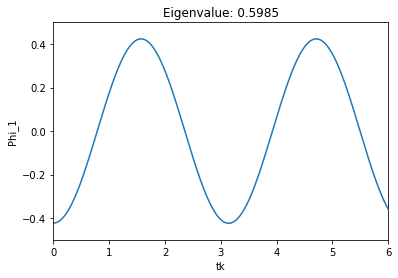

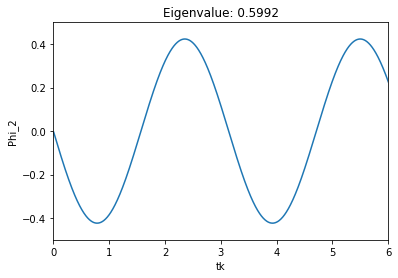

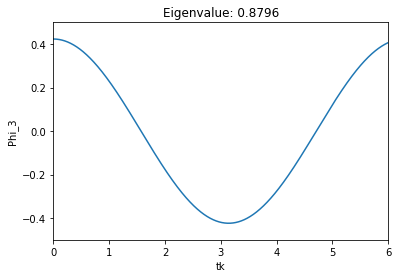

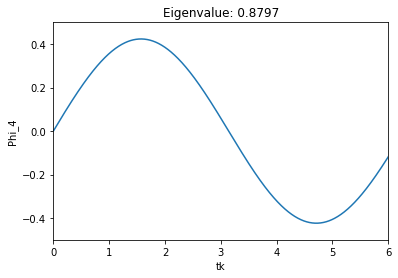

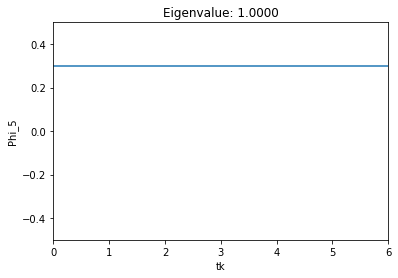

In [5]:
for i in range(_lambda1.shape[0]):
    plt.title(f"Eigenvalue: {_lambda1[i]:.4f}")
    plt.xlim([0, 6])
    plt.ylim([-.5, .5])
    plt.plot(tk_arr, _phi1[:,i]);
    plt.xlabel("tk")
    plt.ylabel(f"Phi_{i+1}")
    plt.show()

# Part two 

Swiss roll dataset

## Create and visualize dataset

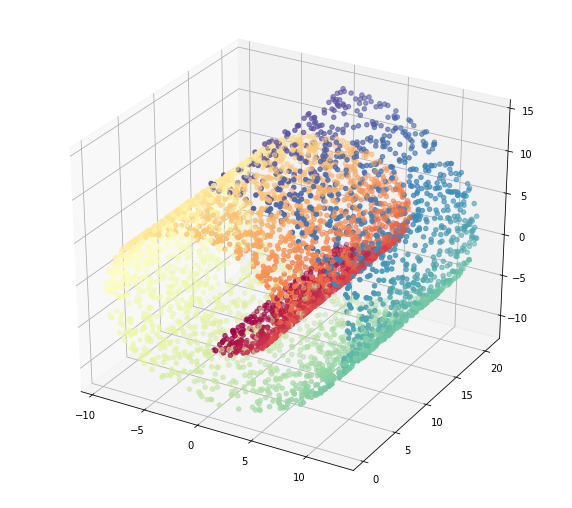

In [6]:
N = 5000
X2, t = make_swiss_roll(N)

fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=t, cmap=plt.cm.Spectral)
plt.show()

## Compute diffusion map and plot eigenfunctions

In [7]:
_lambda2, _phi2 = diffusion_map_algorithm(X2, 9)

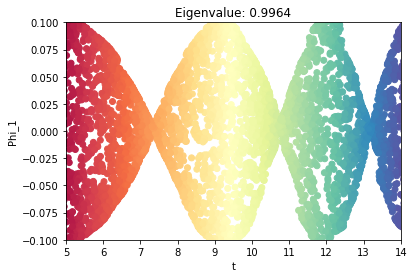

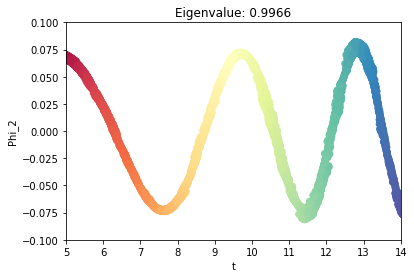

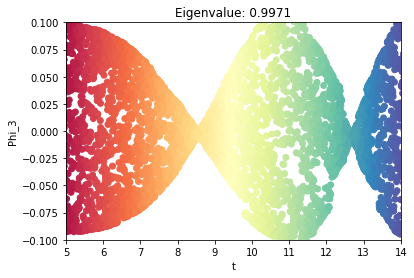

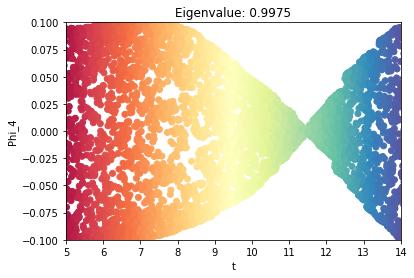

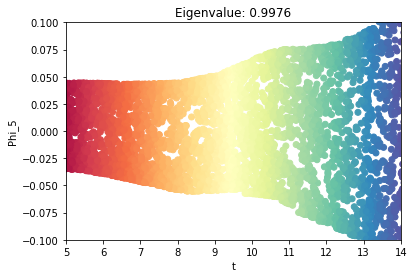

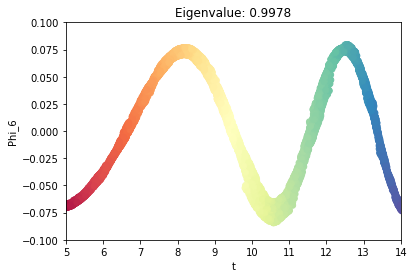

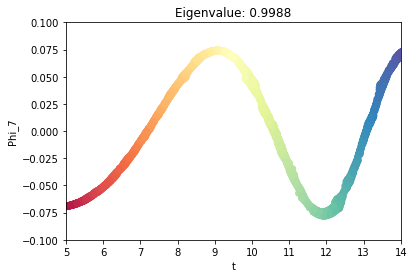

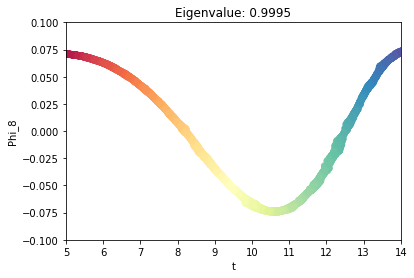

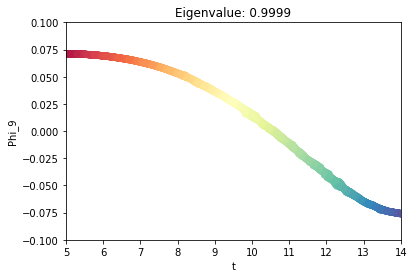

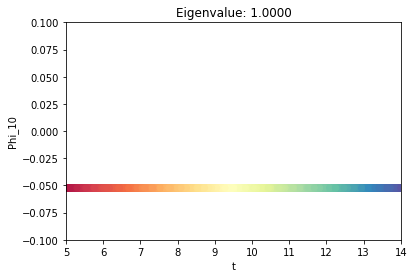

In [8]:
for i in range(_lambda2.shape[0]):
    plt.title(f"Eigenvalue: {_lambda2[i]:.4f}")
    plt.xlim([5, 14])
    plt.ylim([-.1, .1])
    plt.scatter(t, _phi2[:,i], c=t, cmap=plt.cm.Spectral);
    plt.xlabel("t")
    plt.ylabel(f"Phi_{i+1}")
    plt.show()

## Plot eigenfunctions against first non-constant eigenfunction

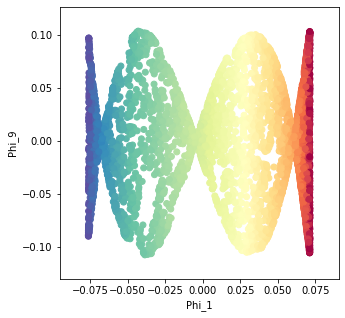

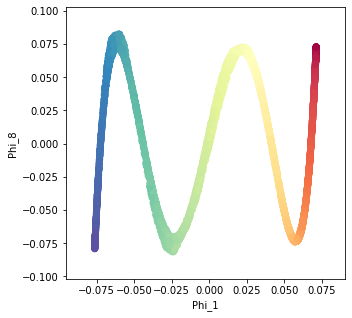

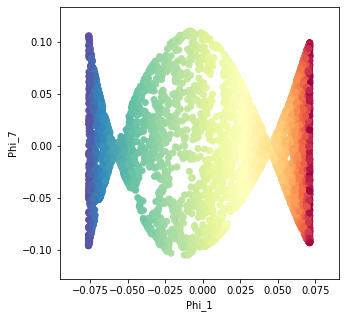

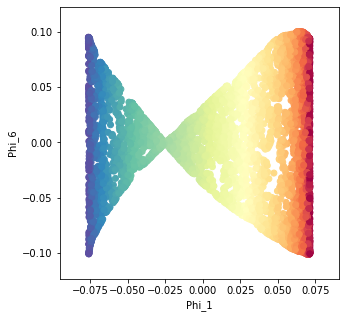

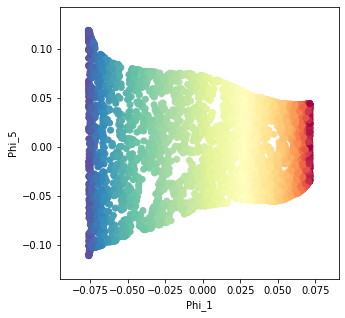

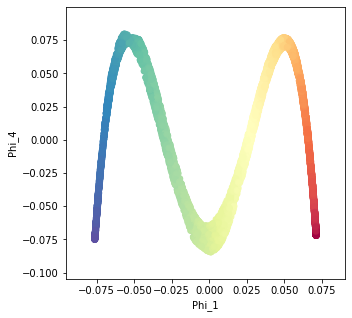

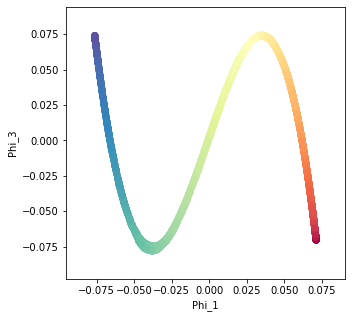

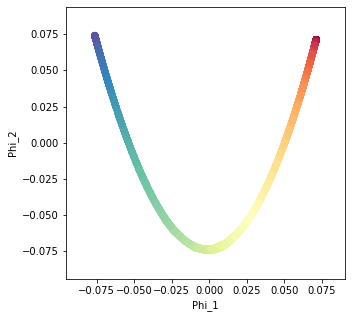

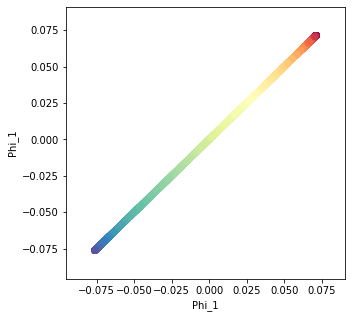

In [9]:
first_non_constant_eigenfunction = _phi2[:,-2]
for i in range(-10,-1):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(first_non_constant_eigenfunction, _phi2[:,i], c=t, cmap=plt.cm.Spectral)
    plt.xlabel("Phi_1")
    plt.ylabel(f"Phi_{abs(i)-1}")
    plt.show()

## Compute principal components 

In [10]:
pca = PCA(n_components=3)
pca.fit(X2)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.39451476 0.31812009 0.28736514]
0.9999999999999999
[501.82729701 450.62802916 428.29173628]


In [11]:
pca = PCA(n_components=2)
pca.fit(X2)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
print(pca.singular_values_)

[0.39451476 0.31812009]
0.7126348568731938
[501.82729701 450.62802916]


# Part three
Trajectory data

In [12]:
X3 = np.genfromtxt("data_DMAP_PCA_vadere.txt", dtype='double')

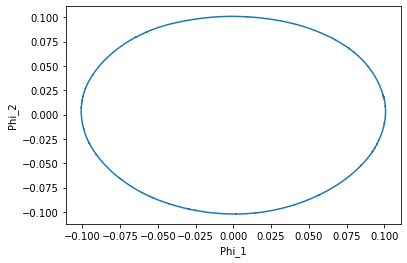

In [13]:
_lambda3, _phi3 = diffusion_map_algorithm(X3, 2)

plt.plot(_phi3[:,1], _phi3[:,0]);
plt.xlabel("Phi_1")
plt.ylabel("Phi_2")
plt.show()

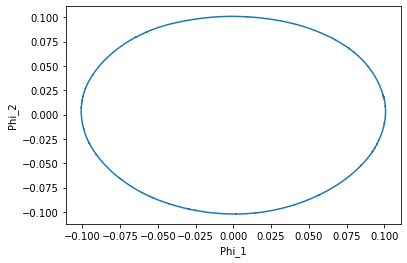

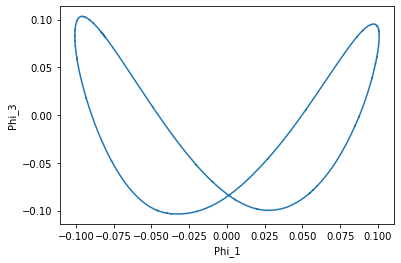

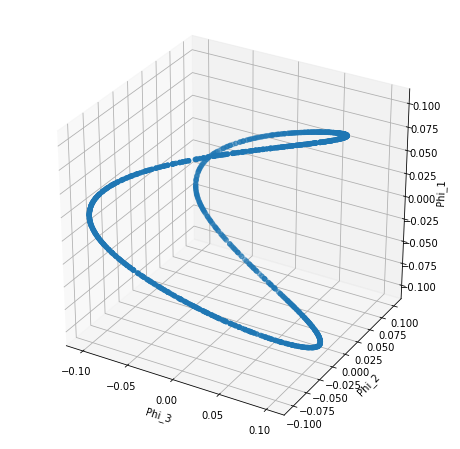

In [14]:
_lambda3, _phi3 = diffusion_map_algorithm(X3, 3)

plt.plot(_phi3[:,-2], _phi3[:,-3]);
plt.xlabel("Phi_1")
plt.ylabel("Phi_2")
plt.show()
plt.plot(_phi3[:,-2], _phi3[:,-4]);
plt.xlabel("Phi_1")
plt.ylabel("Phi_3")
plt.show()

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(_phi3[:, 0], _phi3[:, 1], _phi3[:, 2])
ax.set_xlabel('Phi_3')
ax.set_ylabel('Phi_2')
ax.set_zlabel('Phi_1')
plt.show()